In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
#Read Excel File:
wb_spotify = pd.ExcelFile(r"C:\Users\linds\Downloads\Spotify.xlsx")
sheet_1=pd.read_excel(r"C:\Users\linds\Downloads\Spotify.xlsx")
print(sheet_1.describe(),sheet_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null float64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null object
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
dtypes: float64(10), int64(5), object(4)
memory usage: 24.6+ MB
   

In [ ]:
#After running a few ideas through the data set to filter the duration from 5million, I decided to normalize the duration by dividing by 4000. this way it would be on a scale or 1-100 like the rest of the variblesI also considered doing it to the year section (subtracting it by 1920), but it didn't feel needed and I like seeing the varibles by decade in a graph section below.

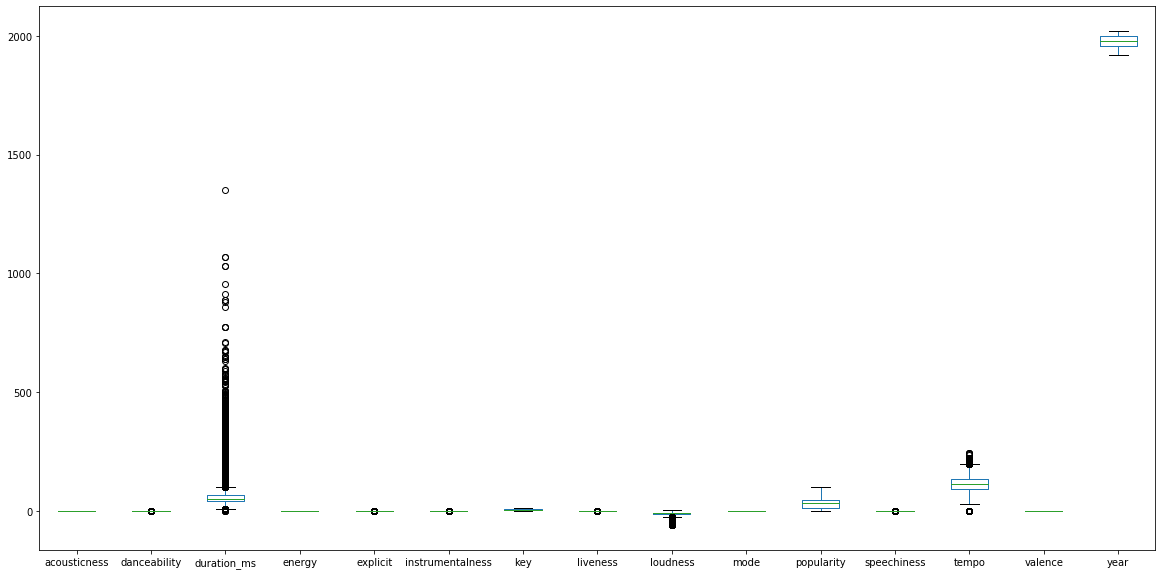

In [30]:
_=sheet_1.plot(x=None, y=None, kind='box', figsize=(20,10))

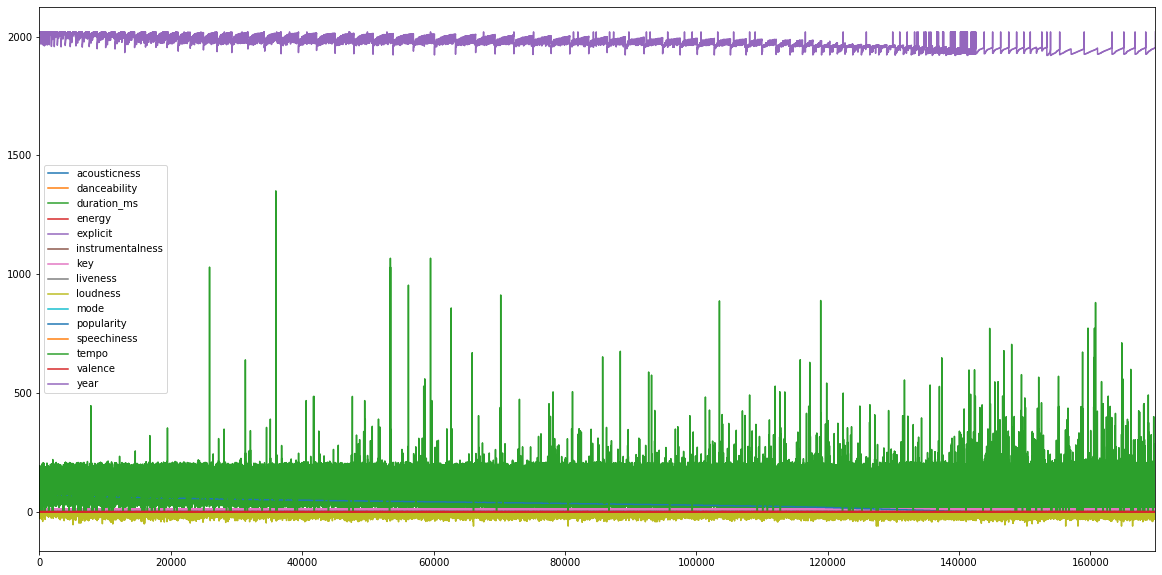

In [31]:
_=sheet_1.plot(x=None, y=None, kind='line', figsize=(20,10))

In [ ]:
#Varibles look mostly steady.

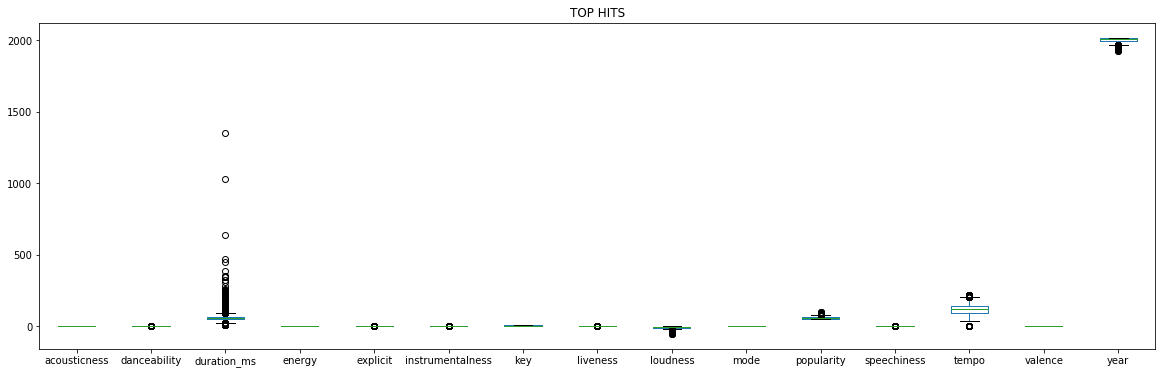

41147


In [32]:
top = sheet_1['popularity'] > 48
top_hit = sheet_1[top]
top_hit.plot(x=None, y=None, kind='box', figsize=(20,6))
plt.title('TOP HITS')
plt.show()
print(len(top_hit))

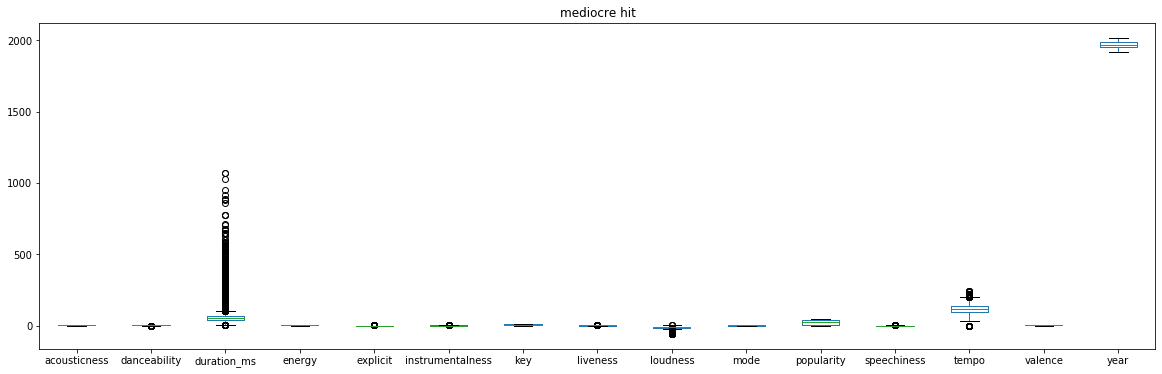

128762


In [33]:
mediocre = sheet_1['popularity'] < 49
mediocre_hit=sheet_1[mediocre]
mediocre_hit.plot(x=None, y=None, kind='box', figsize=(20,6))
plt.title('mediocre hit')
plt.show()
print(len(mediocre_hit))

In [ ]:
#There seems to be more variation in the mediocre varibles.

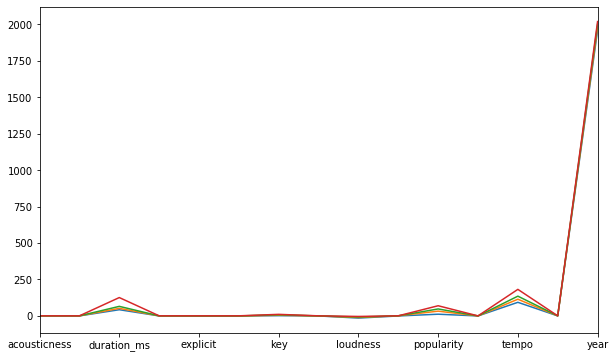

In [34]:
Q1= sheet_1.quantile(.25)
Q2=sheet_1.quantile(.5)
Q3= sheet_1.quantile(.75)
Q4=sheet_1.quantile(.975)
Q1.plot(figsize=(10,6))
Q2.plot(figsize=(10,6))
Q3.plot(figsize=(10,6))
Q4.plot(figsize=(10,6))

In [ ]:
#After normalizing the duration, you can see a little bit of the differences among the varibles.

This is for acousticness


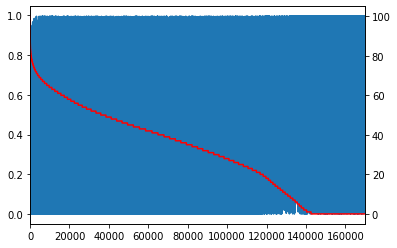

This is for danceability


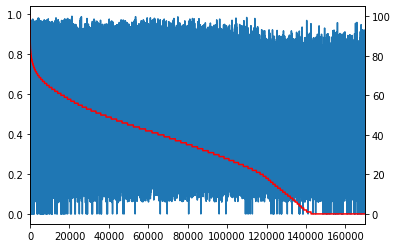

This is for energy


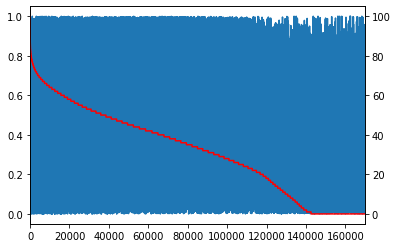

This is for explicit


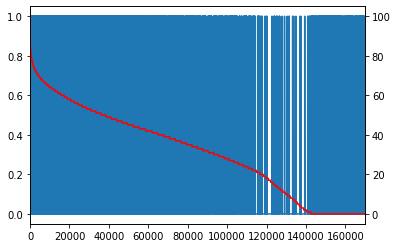

This is for instrumentalness


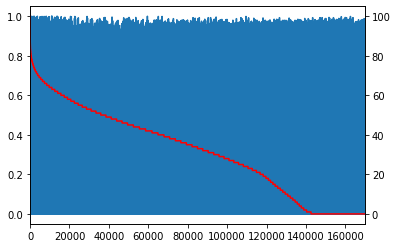

This is for key


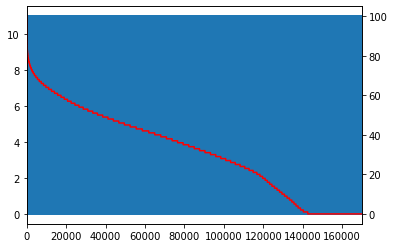

This is for liveness


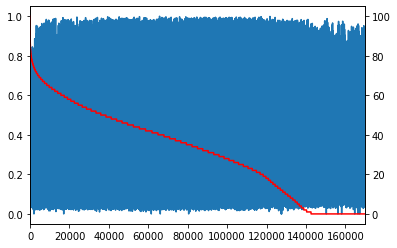

This is for loudness


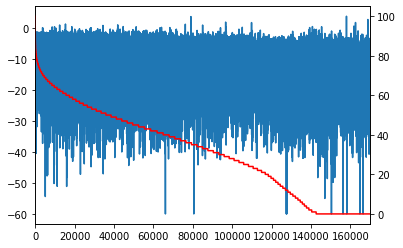

This is for mode


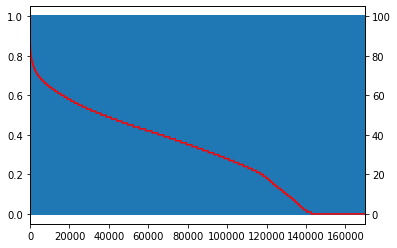

This is for speechiness


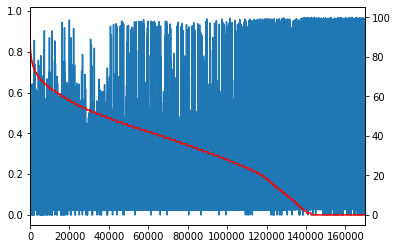

This is for tempo


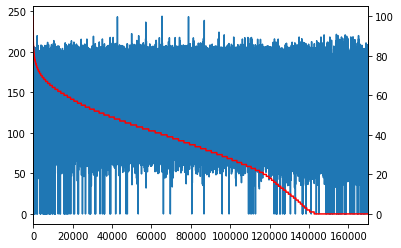

This is for valence


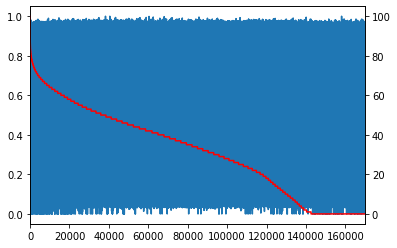

This is for year


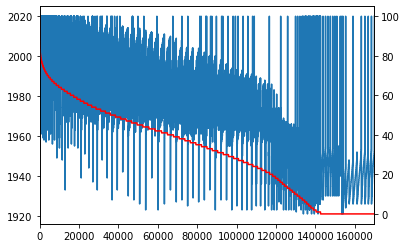

In [35]:
ax1= sheet_1['popularity']
ax2= sheet_1[['acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','year']]
for x in ax2:
    axis1= sheet_1[x].plot()
    axis2=axis1.twinx()
    axis2.plot(ax1,'red',label='popularity')
    print('This is for '+x)
    plt.show()

In [ ]:
#I looked at each variable compared to popularity, I'd like to do this in a time series as well.

This is for acousticness


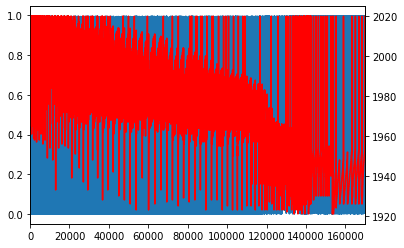

This is for danceability


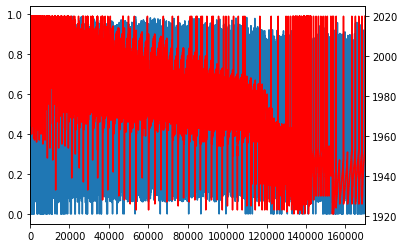

This is for energy


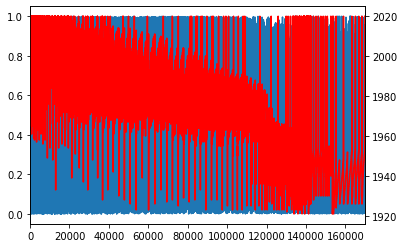

This is for explicit


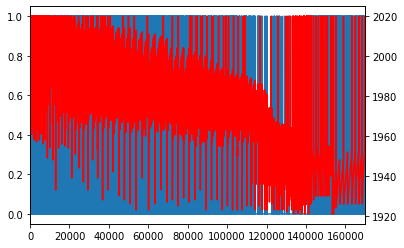

This is for instrumentalness


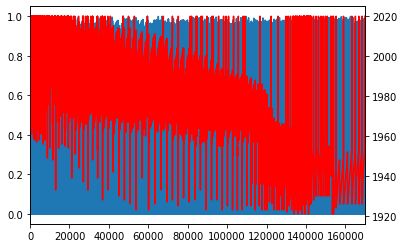

This is for key


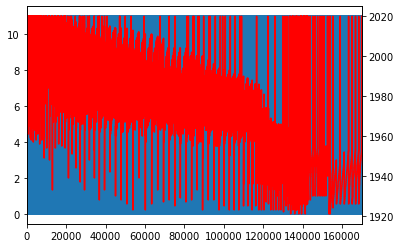

This is for liveness


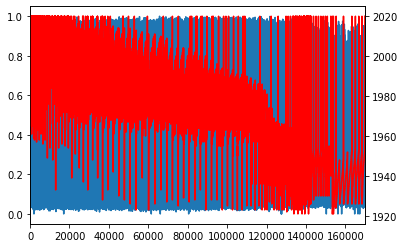

This is for loudness


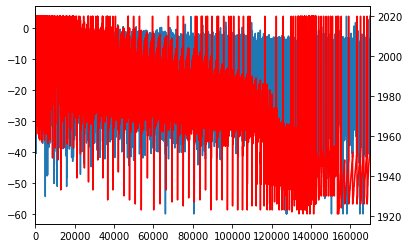

This is for mode


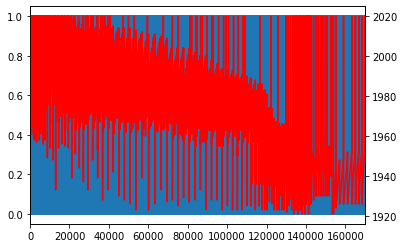

This is for speechiness


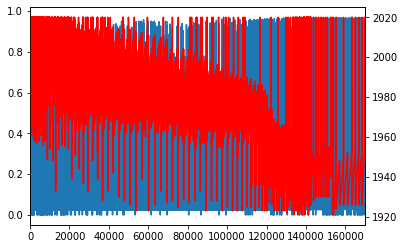

This is for tempo


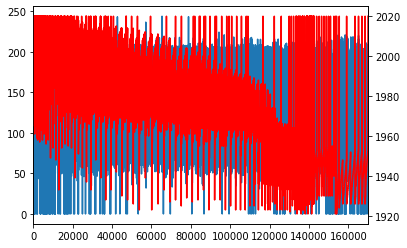

This is for valence


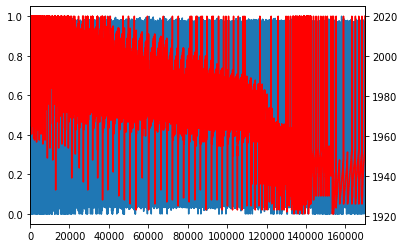

This is for popularity


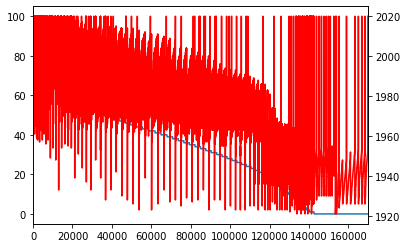

In [36]:
ax1= sheet_1['year']
ax2= sheet_1[['acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','popularity']]
for x in ax2:
    axis1= sheet_1[x].plot()
    axis2=axis1.twinx()
    axis2.plot(ax1,'red',label='year')
    print('This is for '+x)
    plt.show()

In [ ]:
#This is the time series, I think it would be useful to summarize them into decades and then plot each variable.

This is for acousticness


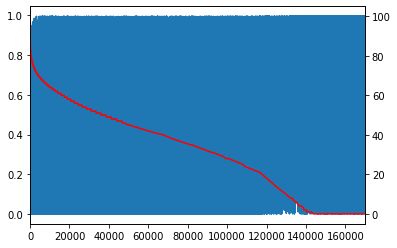

This is for danceability


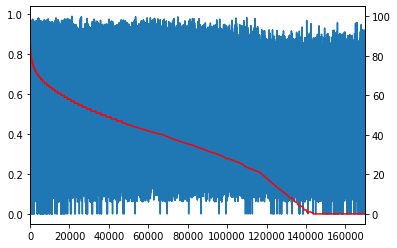

This is for energy


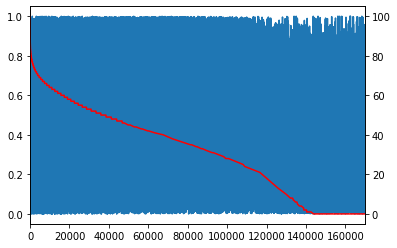

This is for explicit


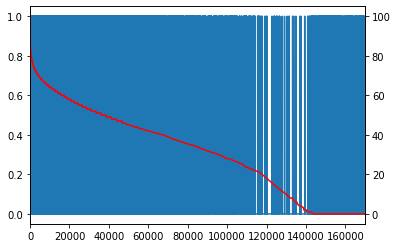

This is for instrumentalness


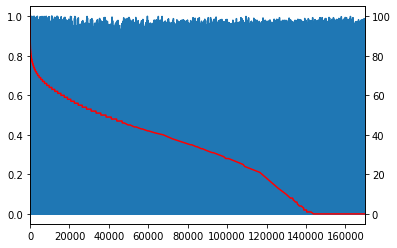

This is for key


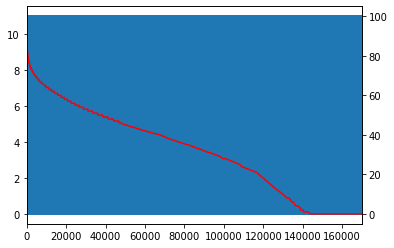

This is for liveness


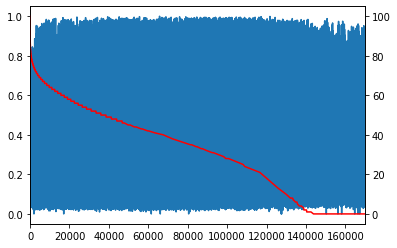

This is for loudness


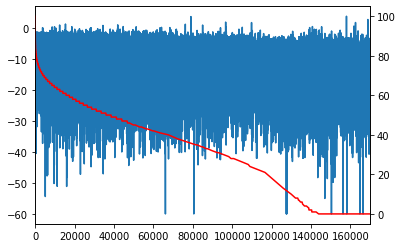

This is for mode


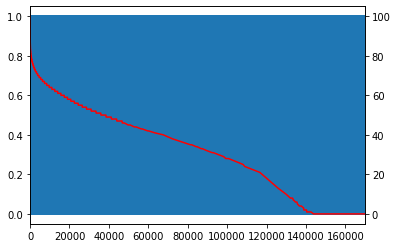

This is for speechiness


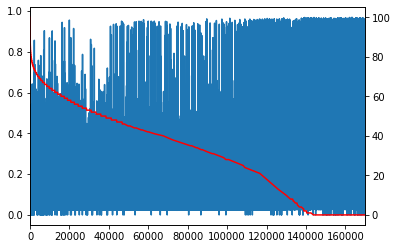

This is for tempo


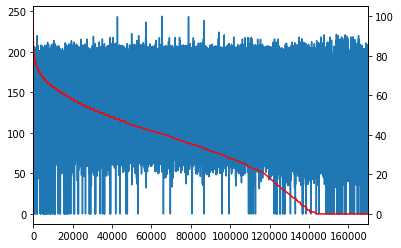

This is for valence


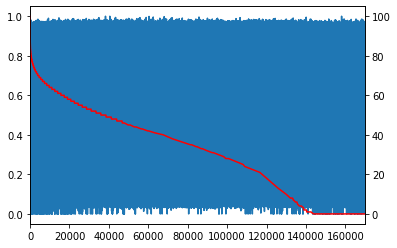

This is for year


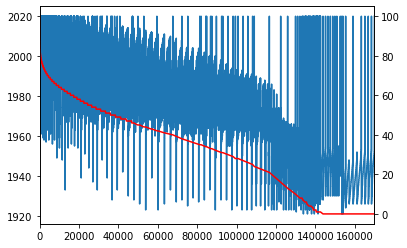

In [7]:
Twenty10s= sheet_1[(sheet_1['year'] >= 2011) & (sheet_1['year'] <=2020)]
ax1= Twenty10s['popularity']
ax2= Twenty10s[['acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','year']]
for x in ax2:
    axis1= sheet_1[x].plot()
    axis2=axis1.twinx()
    axis2.plot(ax1,color='red',label='popularity')
    print('This is for '+x)
    plt.show()

In [ ]:
#this is a decade worth, it doesn't add to an understanding of the data.

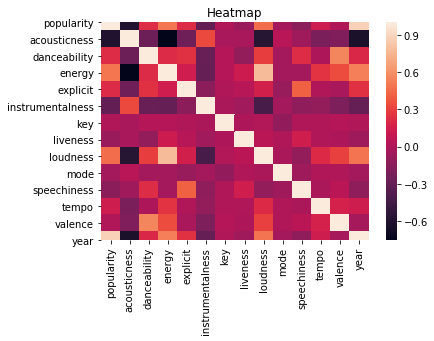

In [2]:
df= pd.DataFrame(sheet_1, columns=['popularity','acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','year'])
corr=df.corr()
sns.heatmap(corr,annot=False)
plt.title('Heatmap')
plt.show()

In [ ]:
#Popularity and year correlate also loudness and energy correlate with eachother while also correlating with popularity

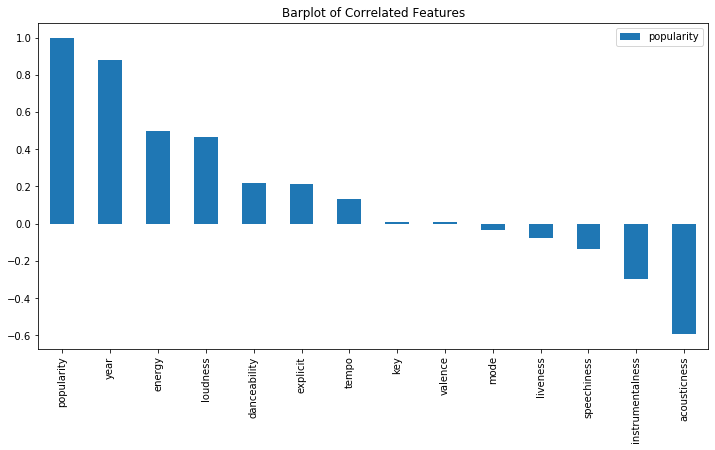

In [3]:
df= pd.DataFrame(sheet_1, columns=['popularity','acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','year'])
df_corr=df.corr()
df_sorted=df_corr.sort_values(['popularity'], ascending=False)
df_sorted.plot(x=None, y='popularity', kind='bar', figsize=(12,6))
plt.title('Barplot of Correlated Features')
plt.show()

In [43]:
#loudness and energy seem to have a positive correlation to popular songs while acousticness is negitive.

In [4]:
Y = sheet_1['popularity']
X = sheet_1[['acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','year']]
X = sm.add_constant(X)
OLSmodel = sm.OLS(Y,X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

C:\Users\linds\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 4.740e+04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:58:45   Log-Likelihood:            -6.3289e+05
No. Observations:              169909   AIC:                         1.266e+06
Df Residuals:                  169895   BIC:                         1.266e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1319.0189      2.738   -481.712      0.000   -1324.386   -1313.652
acousticness        -4.1287      0.113    -36.661      0.000      -4.349      -3.908
danceability         4.7284      0.195     24.201      0.000       4.345       5.111
energy              -1.1187      0.202     -5.526      0.000      -1.515      -0.722
explicit             0.4614      0.104      4.449      0.000       0.258       0.665
instrumentalness    -2.5162      0.092    -27.449      0.000      -2.696      -2.337
key                 -0.0116      0.007     -1.667      0.096      -0.025       0.002
liveness            -2.4789      0.145    -17.147      0.000      -2.762      -2.196
loudness             0.0261      0.008      3.398      0.001       0.011       0.041
mode                -0.2558      0.054     -4.708      0.000      -0.362      -0.149
speechiness         -7.7497      0.197    -39.409      0.000      -8.135      -7.364
tempo                0.0050      0.001      5.955      0.000       0.003       0.007
valence             -0.3265      0.132     -2.478      0.013      -0.585      -0.068
year                 0.6840      0.001    498.384      0.000       0.681       0.687
==============================================================================
Omnibus:                    25766.405   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71693.023
Skew:                           0.824   Prob(JB):                         0.00
Kurtosis:                       5.722   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AxesSubplot(0.125,0.125;0.775x0.755)


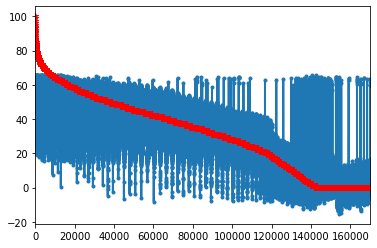

In [48]:
ypred = OLSmodelResult.predict(X).plot(linewidth=2, marker='.')
ypred.plot(sheet_1['popularity'], 'red', linewidth=2, marker='*')
print(ypred)